In [1]:
from __future__ import print_function, division
import os
from PIL import Image
import numpy as np
from torch.utils.data import Dataset
from mypath import Path
from torchvision import transforms
from dataloaders import custom_transforms as tr
import pandas as pd

# class LiverSegmentation(Dataset):
#     """
#     LITS dataset
#     """
#     NUM_CLASSES = 2

#     def __init__(self,
#                  args,
#                  base_dir=Path.db_root_dir('lits_liver'),
#                  split='train',
#                  ):
#         """
#         :param base_dir: path to lits dataset directory
#         :param split: train/val
#         :param transform: transform to apply
#         """
#         super().__init__()
#         self._base_dir = base_dir
#         self.root = os.path.join(self._base_dir,'dataset_6')
#         self.df = pd.read_csv(os.path.join(self._base_dir,"lits_df.csv"))
#         self.train_df = self.df[self.df['study_number']<111]
#         self.test_df = self.df[self.df['study_number']>=111]
        
#         if isinstance(split, str):
#             self.split = [split]
#         else:
#             split.sort()
#             self.split = split

#         self.args = args

#     def __len__(self):
#         for split in self.split:
#             if split == "train":
#                 return len(self.train_df)
#             elif split == 'val':
#                 return len(self.test_df)
                
#     def __getitem__(self, index):

#         for split in self.split:
#             if split == "train":
#                 imgpath = os.path.join(self.root, os.path.basename(self.train_df.iloc[index]['filepath']))
#                 _img = Image.open(imgpath).convert('RGB')
#                 maskpath = os.path.join(self.root, os.path.basename(self.train_df.iloc[index]['liver_maskpath']))
#                 _target = Image.open(maskpath).convert('L')
#                 sample = {'image': _img, 'label': _target}
#                 return self.transform_tr(sample)
            
#             elif split == 'val':
#                 imgpath = os.path.join(self.root, os.path.basename(self.train_df.iloc[index]['filepath']))
#                 _img = Image.open(imgpath).convert('RGB')
#                 maskpath = os.path.join(self.root, os.path.basename(self.train_df.iloc[index]['liver_maskpath']))
#                 _target = Image.open(maskpath).convert('L')
#                 sample = {'image': _img, 'label': _target}
#                 return self.transform_val(sample)


#     def transform_tr(self, sample):
#         composed_transforms = transforms.Compose([
#             tr.RandomRotate(30),
#             tr.RandomHorizontalFlip(),
#             # tr.RandomScaleCrop(base_size=self.args.base_size, crop_size=self.args.crop_size),
#             tr.RandomGaussianBlur(),
#             tr.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#             tr.ToTensor()])

#         return composed_transforms(sample)

#     def transform_val(self, sample):

#         composed_transforms = transforms.Compose([
#             # tr.FixScaleCrop(crop_size=self.args.crop_size),
#             tr.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
#             tr.ToTensor()])

#         return composed_transforms(sample)

#     def __str__(self):
#         return 'LITS_liver(split=' + str(self.split) + ')'



num train img:  5541 num test img:  1573
[0 1]


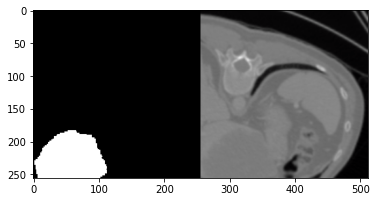

[0 1]


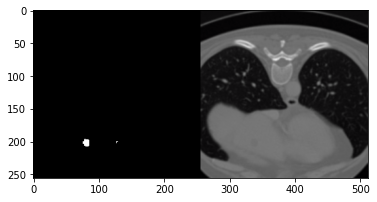

[0]


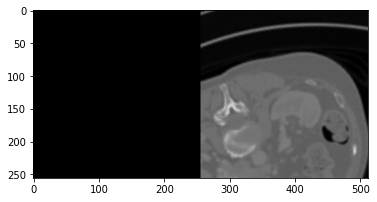

[0 1]


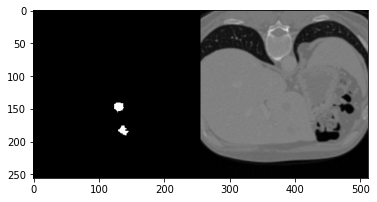

[0 1]


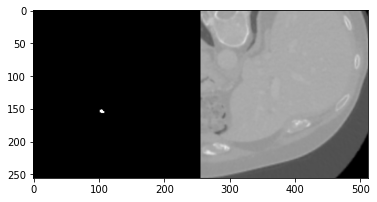

[0 1]


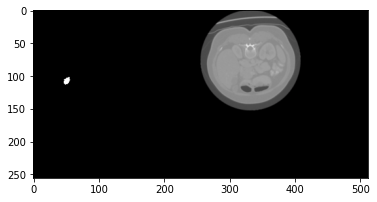

[0 1]


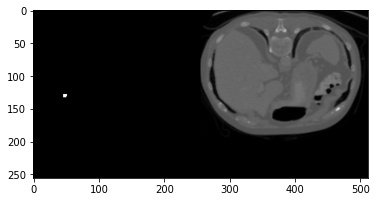

[0 1]


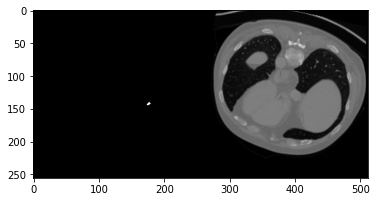

[0 1]


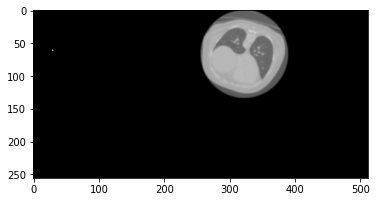

[0 1]


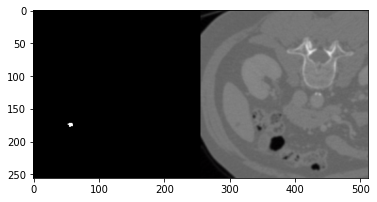

[0 1]


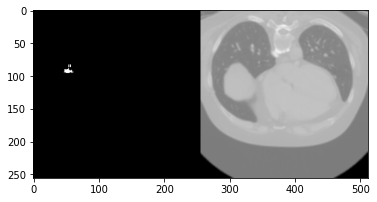

[0 1]


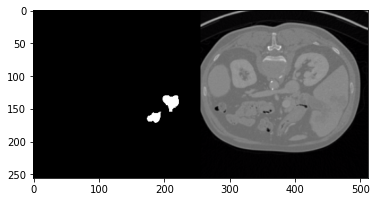

[0 1]


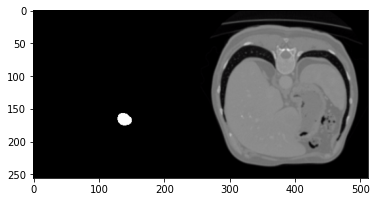

[0 1]


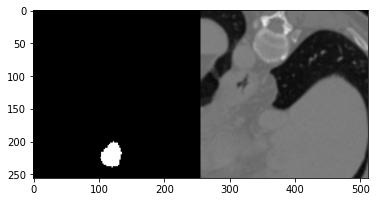

[0 1]


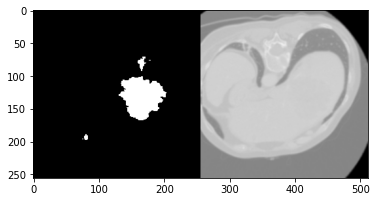

[0 1]


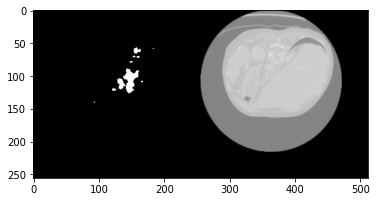

[0 1]


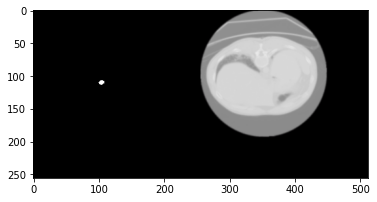

[0 1]


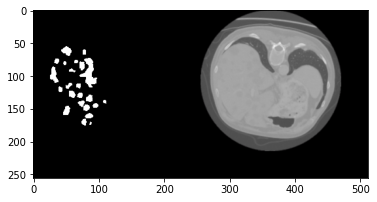

[0 1]


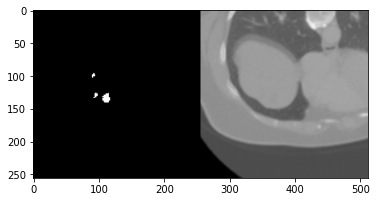

[0]


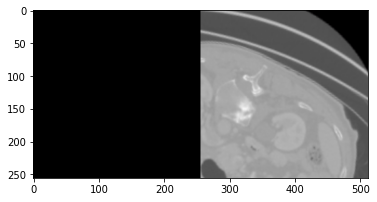

In [7]:
from dataloaders.datasets.lits import LiverSegmentation, TumorSegmentation
from dataloaders.utils import decode_segmap
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import argparse
import cv2

parser = argparse.ArgumentParser()
parser.add_argument('-f')
args = parser.parse_args()
args.base_size = 256
args.crop_size = 256

liver_train = TumorSegmentation(args, split='train')
liver_test = TumorSegmentation(args, split='val')

print("num train img: ", len(liver_train), "num test img: ", len(liver_test))

dataloader = DataLoader(liver_train, batch_size=5, shuffle=True, num_workers=0)

for ii, sample in enumerate(dataloader):
    for jj in range(sample["image"].size()[0]):
        img = sample['image'].numpy()
        gt = sample['label'].numpy()
        # liver = sample['liver'].numpy()
        # tmp_liver = np.array(liver[jj]).astype(np.uint8)
        tmp = np.array(gt[jj]).astype(np.uint8)
        print(np.unique(tmp))
        # break
        # tmp_liver[tmp_liver != 0] = 255
        tmp[tmp == 1] = 255
        # segmap = decode_segmap(tmp, dataset='pascal')
        img_tmp = np.transpose(img[jj], axes=[1, 2, 0])
        img_tmp *= (0.229, 0.224, 0.225)
        img_tmp += (0.485, 0.456, 0.406)
        img_tmp *= 255.0
        img_tmp = img_tmp.astype(np.uint8)
        
        # tmp_liver_ = tmp_liver.copy()
        # tmp_liver_ = cv2.cvtColor(tmp_liver_, cv2.COLOR_GRAY2BGR)
        
        tmp_ = tmp.copy()
        tmp_ = cv2.cvtColor(tmp_, cv2.COLOR_GRAY2BGR)
        # img_tmp_ = img_tmp.copy()
        
        result = cv2.hconcat([tmp_, img_tmp])
        plt.imshow(result, cmap=plt.cm.bone)
        plt.show()
        # img_tmp
        
        # plt.figure()
        # plt.title('display')
        # plt.subplot(211)
        # plt.imshow(img_tmp)
        # plt.subplot(212)
        # plt.imshow(tmp, cmap='gray')

    if ii == 3:
        break

plt.show(block=True) #256x256

array([0, 1], dtype=uint8)